<a href="https://colab.research.google.com/github/lcipolina/escher/blob/master/ML/comodgan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Co-mod-gan 




Switch to tensorflow 1.x 

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
!nvidia-smi 

Tue Jun 15 14:37:44 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Clone the repo


In [ ]:
!git clone https://github.com/zsyzzsoft/co-mod-gan.git

Cloning into 'co-mod-gan'...
remote: Enumerating objects: 108, done.
remote: Counting objects: 100% (108/108), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 108 (delta 40), reused 91 (delta 23), pack-reused 0
Receiving objects: 100% (108/108), 8.68 MiB | 31.86 MiB/s, done.
Resolving deltas: 100% (40/40), done.


## Test the model on custom mask and images


Add your input image and mask to the `imgs` folder and run the below cell. The output will be saved as `output.jpg`

In [ ]:
%cd co-mod-gan/

/content/co-mod-gan


Download the model, copy the id from the drive link.<br>
Example: The ascii after `folders/` and before `?` in the below link:
https://drive.google.com/drive/folders/1tpcwAr2aSNLouoBdeQuW2fCL8v1kAVhS?usp=sharing

In [ ]:
!gdown --id 19EReeIpTqSrO9QomJ49XVYNHGKxkFL1K

Downloading...
From: https://drive.google.com/uc?id=19EReeIpTqSrO9QomJ49XVYNHGKxkFL1K
To: /content/co-mod-gan/network-snapshot-050060.pkl
760MB [00:06, 81.4MB/s]


Now add the image and mask to `imgs/`. Here is an example of a image and its mask:
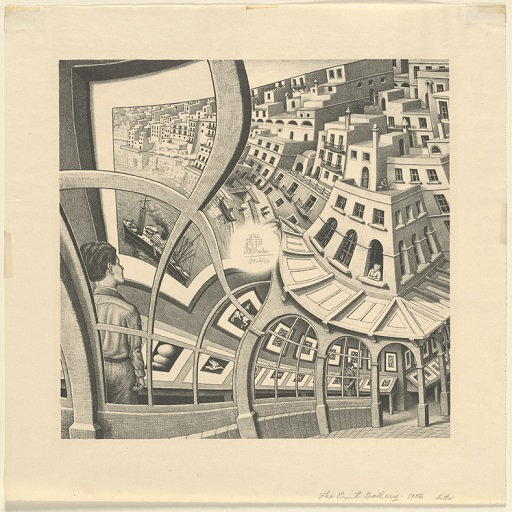
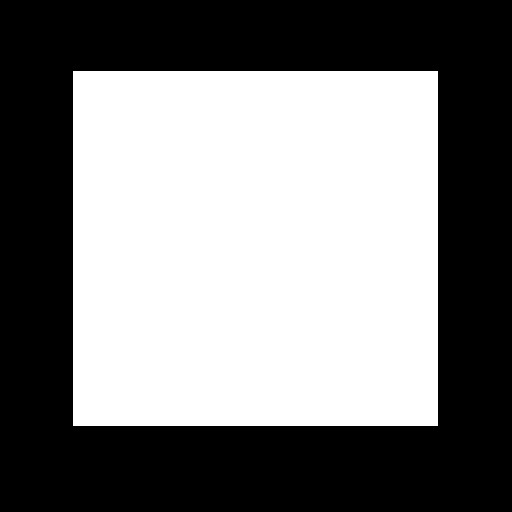

The part of the image that has to be predicted by the model should be in black and the rest in white

In the below code `-c` is for the model, `-i` is for the input image path, `-m` is for mask and `-o` is for path of output

In [ ]:
!python run_generator.py -c "/content/co-mod-gan/network-snapshot-050060.pkl" -i imgs/1.jpg -m imgs/1_mask.jpg -o output.jpg

Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Compiling... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Compiling... Loading... Done.


Download the `output.jpg` to see the completed image :)

Some useful scripts

In [ ]:
import imageio
images = []
filenames=['imgs/painting.jpg','output.jpg']
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('/content/movie1.gif', images,duration=2)

In [ ]:
import cv2
import sys
import numpy as np 


img=cv2.imread('/content/co-mod-gan/imgs/escher_high_res_big.jpg',cv2.IMREAD_UNCHANGED)
turn=int(1)
scale_percent=95 #percent to scale

width_and_height=int(img.shape[0]*scale_percent/100)
dim=(width_and_height,width_and_height)

#resize
resize=cv2.resize(img,dim, interpolation = cv2.INTER_AREA)


#make a template for mask and input image
mask_template=np.array([[0,0,0] for i in range(512*512)]).reshape(512,512,3)

start=int(512/2-width_and_height//2)
end=start+width_and_height

mask=mask_template.copy()

mask_template[start:end,start:end,:]=resize
cv2.imwrite("imgs/painting.jpg",mask_template)
mask_template[start:end,start:end,:]=[255,255,255]
cv2.imwrite("imgs/mask.jpg",mask_template)

True

In [ ]:
import cv2
im1 = cv2.imread('imgs/painting.png')
im1.shape

(512, 512, 3)

In [ ]:
cv2.imwrite('imgs/painting.jpg',im1)

True